# Word Count - NLTK

Count the number of words in a text file using the standard Python libraries.

## Import Libraries

In [5]:
import re
from nltk.probability import FreqDist
from typing import List

## Define the text cleaning operations

In [6]:
def remove_punctuation(value:str) -> str:
    return re.sub('[%!#?\:,*.\]\[(){};“”\'\"’_$\\ufeff]', '', value)

def remove_spaces(value:str) -> str:
    return re.sub('\s+', ' ', value)

def remove_digits(value:str) -> str:
    return re.sub('\d', '', value)

clean_ops = [str.strip, remove_digits, str.lower, remove_punctuation, remove_spaces]

def clean_string(value:str, ops:List) -> str:
    for function in ops:
        value = function(value)

    return value

## Count the word frequencies

In [10]:
word_list = []
file_path = "alice.txt"

# open the input file for reading
with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        word_list.extend(clean_string(line, clean_ops).split(' '))

# get the frequency distribution
fdist = FreqDist(word_list)

# show the word count
fdist.pop("")
sorted(fdist.items(), key=lambda x : x[1], reverse=True)[:20]

[('the', 1824),
 ('and', 912),
 ('to', 802),
 ('a', 689),
 ('of', 632),
 ('it', 537),
 ('she', 537),
 ('said', 458),
 ('you', 433),
 ('in', 432),
 ('i', 392),
 ('alice', 385),
 ('was', 359),
 ('that', 290),
 ('as', 271),
 ('her', 248),
 ('with', 227),
 ('at', 222),
 ('on', 204),
 ('all', 197)]

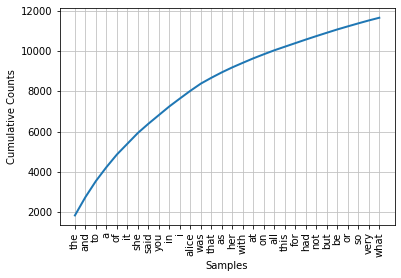

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [8]:
fdist.plot(30, cumulative=True)